<a href="https://colab.research.google.com/github/sid507/Fingerprint-feature-extraction-using-neural-network/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 5
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [3]:

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [4]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = 1/(1+np.exp(-Z2))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [5]:

def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]

    logprobs = np.sum(np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2)))
    cost = -(1/m)*logprobs
    
    cost = float(np.squeeze(cost))  
    
    return cost

In [6]:

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = (1/m)*(np.dot(dZ2,A1.T))
    db2 = (1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x,n_h,n_y)


    for i in range(0, num_iterations):

        A2, cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2,Y,parameters)

        grads = backward_propagation(parameters,cache,X,Y)

        parameters = update_parameters(parameters,grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [9]:
x_train = np.array([

    [0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1, 1, 0, 1],
    [0, 1, 1, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 1, 0],

    [1, 0, 1, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 0, 1, 0],

    [0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 1, 1 ,1],
    [1, 1, 1, 0, 0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 1],

    [0, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 1, 0, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 0],

    [0, 0, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 1, 0, 1, 1],

    [0, 1, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 1, 0, 0],

    [0, 0, 0, 1, 0, 1, 1, 1, 1],
    [1, 1, 0, 1, 0, 0, 1, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 1, 1]

])
print((x_train.T).shape)

y_train = np.array([

    [1], 
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]

])
print(y_train.shape)

for i in x_train:
    print(i)

parameters = nn_model(x_train.T, y_train.T, 5, num_iterations=10000, print_cost=True)


(9, 52)
(52, 1)
[0 1 0 1 0 1 1 0 1]
[1 0 1 1 0 0 0 1 1]
[1 1 0 0 0 1 1 1 0]
[0 1 1 1 0 0 1 0 1]
[1 0 1 1 0 1 0 1 0]
[1 1 0 0 0 1 1 0 1]
[0 1 1 1 0 0 0 1 1]
[1 0 1 0 0 1 1 1 0]
[1 0 1 0 0 0 1 1 1]
[1 0 1 1 0 0 1 0 1]
[1 1 1 0 0 0 1 0 1]
[1 0 1 0 0 1 1 0 1]
[0 1 0 1 0 1 1 1 0]
[0 1 1 1 0 1 0 1 0]
[0 1 0 1 0 1 0 1 1]
[1 1 0 1 0 1 0 1 0]
[0 1 1 0 0 1 1 0 1]
[1 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 1 1 1]
[1 1 1 0 0 1 1 0 0]
[1 0 1 1 0 0 1 1 0]
[1 0 1 0 0 1 0 1 1]
[1 1 1 1 0 0 0 0 1]
[0 0 1 1 0 0 1 1 1]
[0 1 0 0 0 1 1 1 1]
[1 0 0 1 0 1 1 1 0]
[1 1 1 1 0 0 0 1 0]
[0 1 1 1 0 1 0 0 1]
[0 1 0 1 0 0 1 1 1]
[0 0 1 1 0 1 0 1 1]
[1 1 1 0 0 1 0 1 0]
[1 1 0 1 0 1 1 0 0]
[0 0 1 1 0 1 1 1 0]
[0 1 1 1 0 1 1 0 0]
[0 1 1 1 0 0 1 1 0]
[0 1 1 0 0 1 1 1 0]
[1 0 0 1 0 1 0 1 1]
[1 1 0 1 0 1 0 0 1]
[1 1 0 1 0 0 0 1 1]
[1 1 0 0 0 1 0 1 1]
[0 1 1 0 0 0 1 1 1]
[1 1 0 0 0 0 1 1 1]
[1 1 1 0 0 0 1 1 0]
[1 1 1 0 0 0 0 1 1]
[0 0 1 1 0 1 1 0 1]
[1 0 0 1 0 1 0 0 1]
[1 0 1 1 0 1 0 0 1]
[1 0 1 1 0 1 1 0 0]
[0 0 0 1 0 1 1 1 1]
[1 1

In [10]:

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-2.28555152e+00  2.32581410e+00 -4.35055730e+00 -9.70679125e-01
  -1.79343559e-02  2.88419955e+00 -5.83893296e-01 -5.92062544e-03
  -1.12665487e+00]
 [-4.84420113e+00 -2.79430712e+00 -8.36573123e-01 -2.74149360e+00
  -1.11792545e-02  2.77293963e+00 -1.01718630e+00  2.72732772e+00
   3.38507716e+00]
 [-2.04740409e+00 -1.43514828e+00  3.58239210e-01 -1.37528669e+00
   2.56570452e-03  9.69309315e-01  1.05309599e+00  2.26456300e+00
   2.67738270e+00]
 [-2.26093147e+00 -1.39673614e+00  2.15524302e-01  1.77926616e+00
   2.23136679e-02  3.10529366e-01 -4.75861246e+00  2.91275136e+00
  -9.48179041e-01]
 [ 1.37553137e+00  2.69233900e+00 -2.12569395e+00  2.68489403e+00
  -3.13508197e-03  5.57636066e-01 -3.21037310e+00  1.89641079e+00
  -1.65703142e+00]]
b1 = [[-0.92456514]
 [-0.56811645]
 [ 0.34551715]
 [-0.95964943]
 [ 0.57231044]]
W2 = [[ 8.05951499 -9.52111042  6.23732409  8.73919424 -7.94752278]]
b2 = [[2.10388905]]


In [11]:
def predict(parameters, X):
   
    A2, cache = forward_propagation(X,parameters)
    predictions = A2>0.5
    
    return predictions

In [12]:
predictions = predict(parameters,x_train.T)
for i in predictions:
    print(i)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [14]:
import cv2
img=cv2.imread('/content/thinning.jpeg',0)

img=cv2.resize(img,(128,128))
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     if(img[i][j]==255):
#       print(1, end=" ")
#     else:
#       print(0,end=" ")
#   print()

In [15]:
feature_locations = []

for i in range(0,125,3):
  for j in range(0,125,3):
    x=[]
    for m in range(3):
      for n in range(3):
        val = img[i+m][j+n]
        if val == 255:
          x.append(1)
        else:
          x.append(0)
    x=np.array(x)
    x=x.reshape(-1,1)
    # print(x.shape)
    prediction = predict(parameters, x)
    if prediction > 0.5:
      feature_locations.append([i+1, j+1])

print(feature_locations)    



[[4, 55], [13, 61], [13, 64], [13, 70], [16, 25], [16, 28], [16, 37], [16, 40], [16, 43], [16, 46], [16, 49], [16, 52], [16, 58], [16, 76], [16, 79], [19, 37], [19, 73], [19, 76], [22, 28], [22, 37], [22, 40], [22, 43], [22, 46], [22, 52], [22, 76], [22, 97], [25, 19], [25, 25], [25, 31], [25, 34], [25, 37], [25, 40], [25, 46], [25, 52], [25, 58], [25, 61], [25, 64], [25, 67], [25, 76], [25, 97], [28, 19], [28, 22], [28, 34], [28, 49], [28, 58], [28, 61], [28, 64], [28, 85], [28, 91], [31, 19], [31, 22], [31, 25], [31, 34], [31, 52], [31, 55], [31, 58], [31, 61], [31, 64], [31, 67], [31, 73], [31, 100], [34, 19], [34, 25], [34, 58], [34, 61], [34, 64], [34, 67], [34, 70], [34, 76], [34, 82], [34, 94], [34, 100], [37, 31], [37, 64], [37, 79], [37, 88], [40, 19], [40, 25], [40, 31], [40, 43], [40, 49], [40, 55], [40, 58], [40, 61], [40, 70], [40, 103], [43, 19], [43, 37], [43, 67], [43, 73], [43, 79], [43, 88], [43, 97], [43, 106], [46, 13], [46, 70], [49, 10], [49, 37], [49, 49], [49, 5

(128, 128, 3)


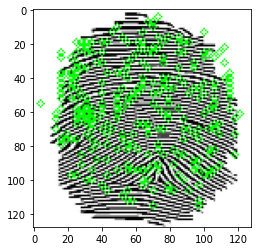

In [17]:
img2=cv2.imread('/content/fingerprint2.JPG')
img2=cv2.resize(img2,(128,128))
print(img2.shape)
for i in feature_locations:
  cv2.circle(img2, (i[0], i[1]), 2, (0, 255, 0))

plt.imshow(img2)